# Purpose

To display some of the more useful features of the `manufacturing` package.

## Package Import and Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import manufacturing as mn

%matplotlib inline

mn.__version__

'0.7.0'

## Data Import

Import the data from an excel sheet.  Note that the 

In [2]:
data = mn.import_excel('../manufacturing/examples/example_data_with_faults.xlsx', 
                       columnname='value (lcl=-7.4 ucl=7.4)', skiprows=3)
data

{'data': 0      2.319945
 1      1.959092
 2     -0.753842
 3     -3.243669
 4     -3.000000
          ...   
 113   -2.453991
 114    2.443451
 115   -1.242465
 116    2.036685
 117   -0.363658
 Name: value (lcl=-7.4 ucl=7.4), Length: 118, dtype: float64,
 'lower_control_limit': -7.4,
 'upper_control_limit': 7.4}

Looks like the data contains about 100 data points.  Lets try to plot the Cpk to determine if the limits are acceptable.

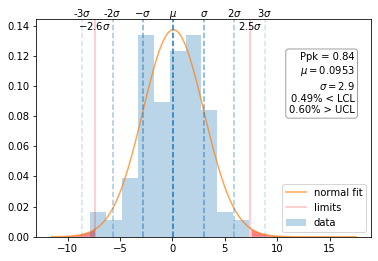

In [3]:
mn.ppk_plot(**data)

Looks like the about 1.5% of the units will fall beyond the control limits.

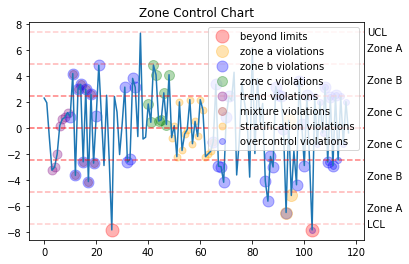

In [4]:
mn.control_plot(**data)

This is showing a lot of faults, and some of them are overlapping... especially between samples 10 and 20.  To clear it up, we are going to turn off the zone b violations and have another look.

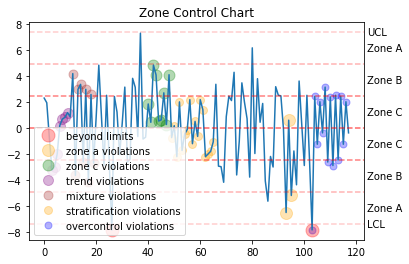

In [5]:
mn.control_plot(highlight_zone_b=False, **data)

Same plot, but we can now clearly see that there are some zone a violations between samples 10 and 20.

/home/jason/code/notebooks/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
shapiro test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


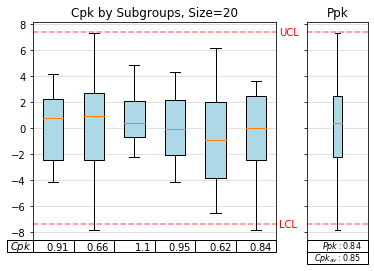

In [6]:
mn.cpk_plot(**data, subgroup_size=20)